In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
from sklearn import preprocessing
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
df.shape

(4410, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [10]:
df['NumCompaniesWorked'].mode()

0    1.0
dtype: float64

In [11]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(2)
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(11.28) 

In [12]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

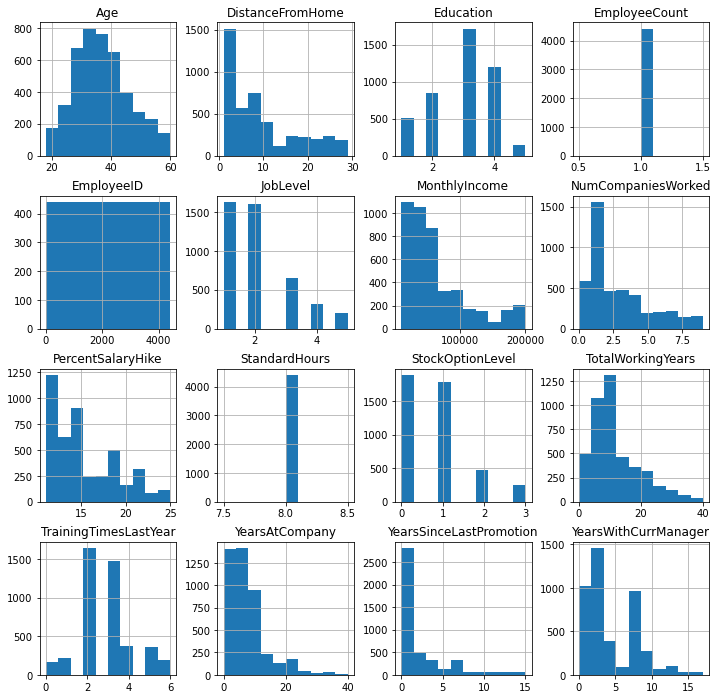

In [13]:
df.hist(figsize=(12,12))
plt.show()

In [15]:
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['Over18'] = le.fit_transform(df['Over18'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['Gender'] = le.fit_transform(df['Gender'])
df['EducationField'] = le.fit_transform(df['EducationField'])

In [16]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
featre

In [19]:
x = df.drop(['Attrition'], axis=1)
y = df.iloc[:,1:2]

In [21]:
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,1,1,0,1,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,10,1,1,1,2,0,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,3,1,4,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,4,1,3,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,5,1,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
rf_model.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
rf_model.oob_score_

0.9997732426303855

In [25]:
for x,imp in zip(x,rf_model.feature_importances_):
    print(x,":",imp);

Age : 0.09158621266733592
BusinessTravel : 0.02715420806889329
Department : 0.0250383136918337
DistanceFromHome : 0.06739302223012322
Education : 0.03877824451703801
EducationField : 0.04019362136783115
EmployeeCount : 0.0
EmployeeID : 0.03771045048933414
Gender : 0.016818747178304002
JobLevel : 0.03640104933329164
JobRole : 0.05294770216923067
MaritalStatus : 0.038492021163264674
MonthlyIncome : 0.08879409341122554
NumCompaniesWorked : 0.05396369120917321
Over18 : 0.0
PercentSalaryHike : 0.06368189569415059
StandardHours : 0.0
StockOptionLevel : 0.032804015190899066
TotalWorkingYears : 0.0826531116212968
TrainingTimesLastYear : 0.04343958296987289
YearsAtCompany : 0.06837549412705375
YearsSinceLastPromotion : 0.041503029155417516
YearsWithCurrManager : 0.05227149374443013


__Inference__

Age,MonthlyIncome,TotalWorkingYears are most important features and decision tree will be made based on these features only.

In [31]:
predictors=df[['Age','MonthlyIncome','TotalWorkingYears']]
tree_model=tree.DecisionTreeClassifier(max_depth=8)
tree_model.fit(predictors,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
tree_model.score(predictors,y)

0.8841269841269841

# Tree Formation

In [34]:
with open('dtree_attrition.dot','w')as f:
    f=tree.export_graphviz(tree_model,feature_names=['Age','MonthlyIncome','TotalWorkingYears'],out_file=f);

In [35]:
from sklearn.tree import export_text
feature=["Age","MonthlyIncome","TotalWorkingYears"]
r=export_text(tree_model,feature_names=feature)
print(r)

|--- TotalWorkingYears <= 1.50
|   |--- Age <= 33.50
|   |   |--- MonthlyIncome <= 112610.00
|   |   |   |--- MonthlyIncome <= 23140.00
|   |   |   |   |--- MonthlyIncome <= 20325.00
|   |   |   |   |   |--- MonthlyIncome <= 19425.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MonthlyIncome >  19425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- MonthlyIncome >  20325.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- MonthlyIncome >  23140.00
|   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |--- Age <= 18.50
|   |   |   |   |   |   |--- MonthlyIncome <= 25995.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- MonthlyIncome >  25995.00
|   |   |   |   |   |   |   |--- MonthlyIncome <= 33490.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- MonthlyIncome >  33490.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  18.50
|   |   |   |   |   |   |--- MonthlyIncome 